In [1]:
import os
import sktime
import pandas as pd
from sktime.datasets import load_from_tsfile
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sktime.classification.interval_based import TimeSeriesForestClassifier
import numpy as np

In [2]:
# Load time series data
X, y = load_from_tsfile('/Users/PRADEEP SHETTY/Desktop/IEEE internship/final.ts', return_data_type="numpy3d")

In [3]:
# Reshape the time series data
X1 = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50,200),
    'min_interval': np.arange(1, 24),
}

In [8]:
# Create and fit the RandomizedSearchCV object
clf = TimeSeriesForestClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=TimeSeriesForestClassifier(random_state=42),
                   param_distributions={'min_interval': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  9...
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])},
                   random_state=42, scoring='roc_auc')

In [42]:
# Get the best classifier from RandomizedSearchCV
best_clf = random_search.best_estimator_

In [30]:
# Fit the best classifier on the combined training and validation set
#clf.fit(X_train, y_train)

TimeSeriesForestClassifier(random_state=42)

In [60]:
# Convert string labels to numerical values
y_test_numerical = y_test.astype(int)

In [61]:
# Calculate ROC AUC on the validation set
y_val_pred_probabilities = best_clf.predict_proba(X_test)[:, 1]
roc_auc_val = roc_auc_score(y_test_numerical, y_val_pred_probabilities)
print("Validation ROC AUC:", roc_auc_val)

Validation ROC AUC: 0.8582123411978221


In [62]:
# Make predictions on the test set
y_test_pred = best_clf.predict(X_test)

In [63]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7616279069767442


In [64]:
# Convert string labels to numerical values
y_test_numerical = y_test.astype(int)

In [65]:
# Calculate ROC AUC on the test set
y_test_pred_probabilities = best_clf.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test_numerical, y_test_pred_probabilities)
print("Test ROC AUC:", roc_auc_test)

Test ROC AUC: 0.8582123411978221


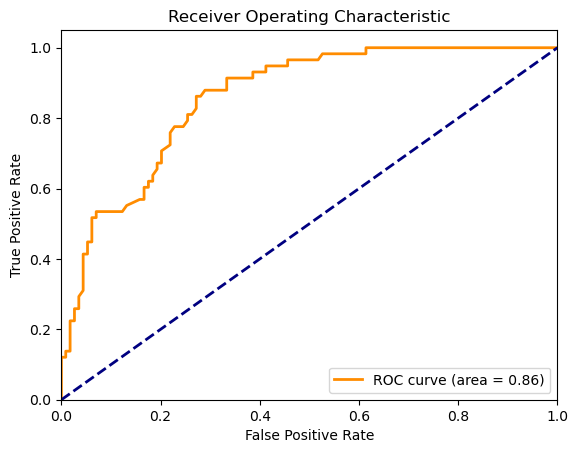

In [66]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numerical, y_test_pred_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()